<a href="https://colab.research.google.com/github/2303A51462/Data-Mining/blob/main/Lab-07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

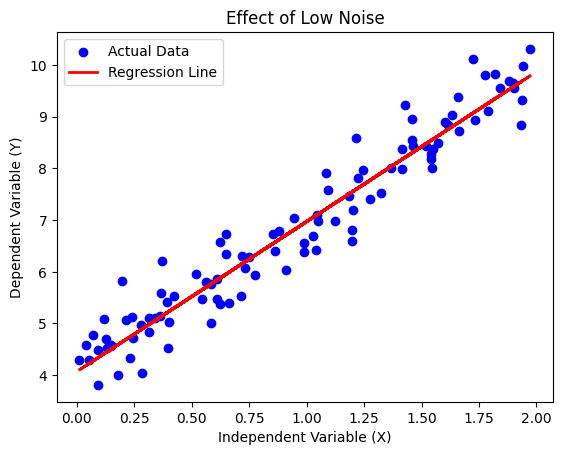

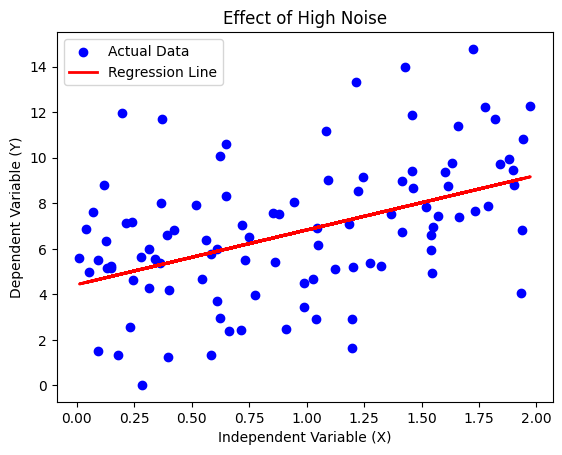

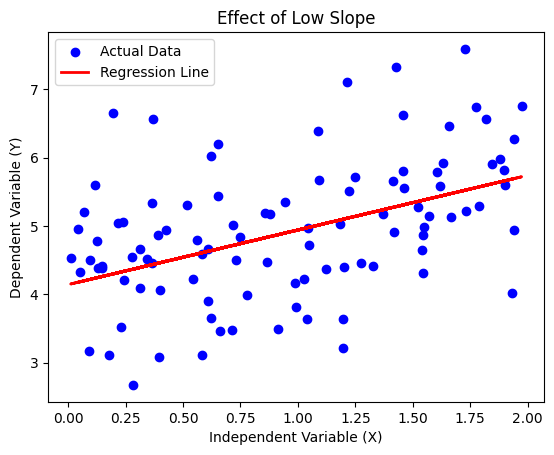

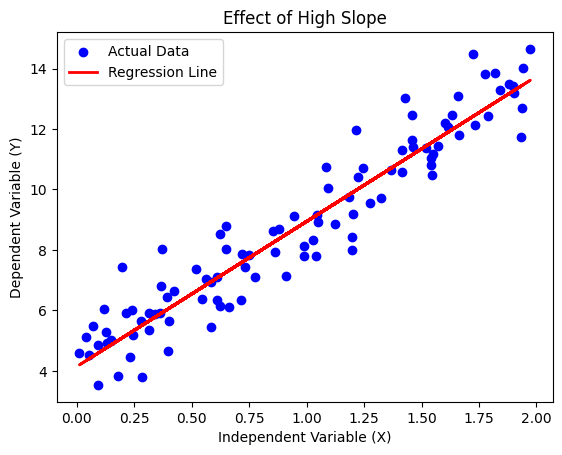

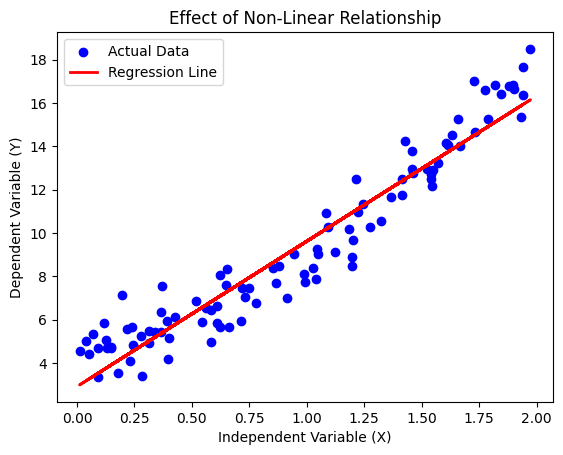

Low Noise: MSE = 0.16342487842925071 R2 = 0.9506549318923121
High Noise: MSE = 5.883295623453016 R2 = 0.14908381866285147
Low Slope: MSE = 0.6536995137170022 R2 = 0.14908381866285114
High Slope: MSE = 0.6536995137170024 R2 = 0.9287298556395622
Non-Linear: MSE = 1.1091155640916268 R2 = 0.9375129997756676


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to generate synthetic data
def generate_data(noise_level=1.0, slope=3, intercept=4, num_points=100, nonlinear=False):
    np.random.seed(42)
    X = 2 * np.random.rand(num_points, 1)
    if nonlinear:
        y = intercept + slope * X + 2 * X**2 + noise_level * np.random.randn(num_points, 1)
    else:
        y = intercept + slope * X + noise_level * np.random.randn(num_points, 1)
    return X, y

# Function to train and evaluate a linear regression model
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

# Function to plot regression results
def plot_results(X, y, model, title):
    plt.scatter(X, y, color="blue", label="Actual Data")
    plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")
    plt.xlabel("Independent Variable (X)")
    plt.ylabel("Dependent Variable (Y)")
    plt.legend()
    plt.title(title)
    plt.show()

# Experiment 1: Effect of Noise
X1, y1 = generate_data(noise_level=0.5)
model1, mse1, r21 = train_and_evaluate(X1, y1)
plot_results(X1, y1, model1, "Effect of Low Noise")

X2, y2 = generate_data(noise_level=3.0)
model2, mse2, r22 = train_and_evaluate(X2, y2)
plot_results(X2, y2, model2, "Effect of High Noise")

# Experiment 2: Changing the Slope
X3, y3 = generate_data(slope=1)
model3, mse3, r23 = train_and_evaluate(X3, y3)
plot_results(X3, y3, model3, "Effect of Low Slope")

X4, y4 = generate_data(slope=5)
model4, mse4, r24 = train_and_evaluate(X4, y4)
plot_results(X4, y4, model4, "Effect of High Slope")

# Experiment 3: Non-linear Relationship
X5, y5 = generate_data(nonlinear=True)
model5, mse5, r25 = train_and_evaluate(X5, y5)
plot_results(X5, y5, model5, "Effect of Non-Linear Relationship")

# Print MSE and R2 Scores
print("Low Noise: MSE =", mse1, "R2 =", r21)
print("High Noise: MSE =", mse2, "R2 =", r22)
print("Low Slope: MSE =", mse3, "R2 =", r23)
print("High Slope: MSE =", mse4, "R2 =", r24)
print("Non-Linear: MSE =", mse5, "R2 =", r25)
